# Movies dataset example

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv('./data/movie_ratings.csv').set_index('Movie')

In [7]:
ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
Incredibles 2,4,2,3,4,4
Jurassic World: Fallen Kingdom,2,3,5,4,5
Mission: Impossible – Fallout,5,5,4,3,2


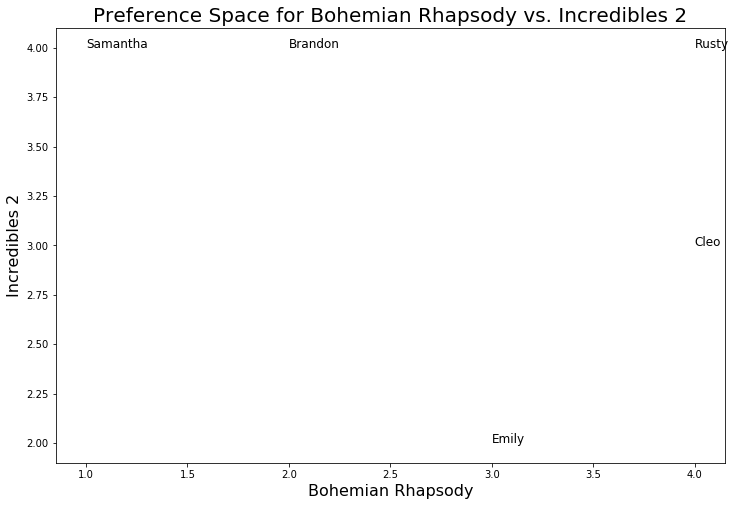

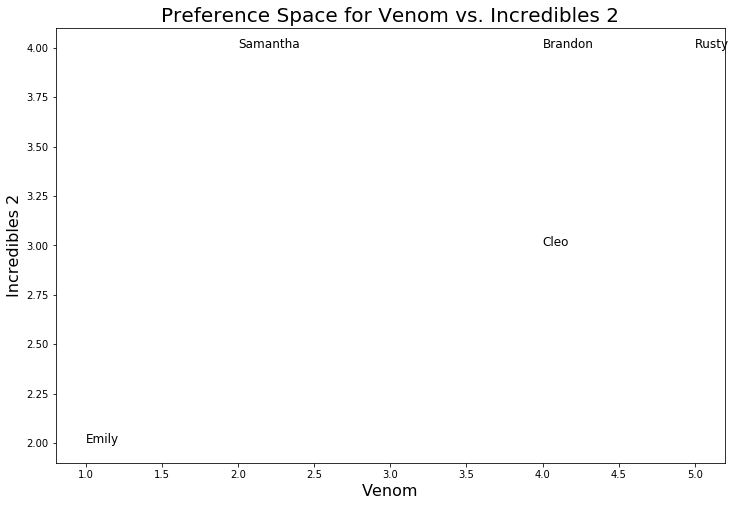

In [11]:
import matplotlib.pyplot as plt

def ratings_scatter(movie1, movie2):
    x = ratings.T[movie1]
    y = ratings.T[movie2]
    n = list(ratings.T.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preference Space for "+ movie1 + " vs. " + movie2, fontsize=20)
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

ratings_scatter('Bohemian Rhapsody', 'Incredibles 2')
ratings_scatter('Venom', 'Incredibles 2')

In [12]:
from scipy.spatial.distance import pdist, squareform

distances = pdist(ratings.T, 'euclidean')
print(distances)
print("-----Squareform-----")
print(squareform(distances))

[6.63324958 6.         7.41619849 7.48331477 6.92820323 6.40312424
 5.09901951 5.56776436 8.24621125 6.70820393]
-----Squareform-----
[[0.         6.63324958 6.         7.41619849 7.48331477]
 [6.63324958 0.         6.92820323 6.40312424 5.09901951]
 [6.         6.92820323 0.         5.56776436 8.24621125]
 [7.41619849 6.40312424 5.56776436 0.         6.70820393]
 [7.48331477 5.09901951 8.24621125 6.70820393 0.        ]]


In [13]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [14]:
tom = {'Aquaman': 2,
 'Avengers: Infinity War': 1,
 'Black Panther': 5,
 'Bohemian Rhapsody': 5,
 'Deadpool 2': 2,
 'Fantastic Beasts: The Crimes of Grindelwald': 3,
 'Incredibles 2': 3,
 'Jurassic World: Fallen Kingdom': 4,
 'Mission: Impossible – Fallout': 3,
 'Venom': 3}

ratings['Tom'] = pd.Series(tom)
ratings

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Movie,,,,,,
Aquaman,4,1,2,2,2,2
Avengers: Infinity War,2,5,2,5,5,1
Black Panther,5,2,5,1,1,5
Bohemian Rhapsody,2,3,4,4,1,5
Deadpool 2,3,2,4,5,1,2
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5,3
Incredibles 2,4,2,3,4,4,3
Jurassic World: Fallen Kingdom,2,3,5,4,5,4
Mission: Impossible – Fallout,5,5,4,3,2,3


In [15]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

print(distances)
similarities = distances['Tom'].sort_values(ascending=False)[1:]

## Este es el vector de similiaridad de TOM con el resto de usuarios respecto a sus
## visualizaciones comunes

similarities

           Brandon     Emily      Cleo     Rusty  Samantha       Tom
Brandon   1.000000  0.131006  0.142857  0.118818  0.117878  0.156613
Emily     0.131006  1.000000  0.126132  0.135078  0.163961  0.135078
Cleo      0.142857  0.126132  1.000000  0.152259  0.108152  0.217129
Rusty     0.118818  0.135078  0.152259  1.000000  0.129732  0.126132
Samantha  0.117878  0.163961  0.108152  0.129732  1.000000  0.116961
Tom       0.156613  0.135078  0.217129  0.126132  0.116961  1.000000


Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

In [16]:
new_ratings = pd.read_csv('data/movie_ratings2.csv').set_index('Movie')
new_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [18]:
recommendations = new_ratings.copy()
recommendations

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [20]:
for name, score in similarities.items():
    recommendations[name] = recommendations[name] * score

recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.098111,0.091230,0.235726,0.015909,0.02736,3.215879
Wonder Woman,0.098111,0.054738,0.188580,0.047728,0.05472,3.190322
Thor: Ragnarok,0.098111,0.054738,0.188580,0.015909,0.06840,3.036881
Guardians of the Galaxy Vol. 2,0.098111,0.018246,0.235726,0.063637,0.02736,3.028706
Jumanji: Welcome to the Jungle,0.098111,0.054738,0.141435,0.031819,0.06840,2.914647
Spider-Man: Homecoming,0.024528,0.054738,0.235726,0.031819,0.06840,2.899774
Wolf Warrior 2,0.122638,0.054738,0.094290,0.047728,0.05472,2.842914
Beauty and the Beast,0.049055,0.091230,0.094290,0.079546,0.02736,2.628940
Star Wars: The Last Jedi,0.122638,0.072984,0.047145,0.031819,0.02736,2.328640


In [22]:
recommendations.sort_values('Total', ascending=False)["Total"][0:4]


Movie
Despicable Me 3                   3.215879
Wonder Woman                      3.190322
Thor: Ragnarok                    3.036881
Guardians of the Galaxy Vol. 2    3.028706
Name: Total, dtype: float64

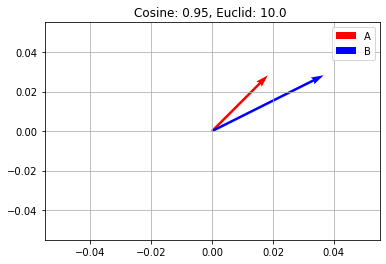

In [23]:
import scipy.spatial.distance as distance
import numpy as np
import matplotlib.pyplot as plt
import math

def dot_product(v1, v2):
    return sum(map(lambda x: x[0] * x[1], zip(v1, v2)))

def cosine_measure(v1, v2):
    prod = dot_product(v1, v2)
    len1 = math.sqrt(dot_product(v1, v1))
    len2 = math.sqrt(dot_product(v2, v2))
    return prod / (len1 * len2)

def plotVectors(V):
    origin = (0,0)
    plt.quiver(*origin, V[0,0], V[0,1], color=['r'], scale=60)
    plt.quiver(*origin, V[1,0], V[1,1], color=['b'], scale=60)

    a = V[0]
    b = V[1]
    simCos = cosine_measure(a,b)
    simEuc = distance.euclidean(a,b)

    titl = "Cosine: {}, Euclid: {} ".format(simCos.round(2), simEuc.round(2))
    plt.title(titl)
    plt.grid()
    plt.legend(["A","B"])

    
V = np.array([[10,10],[20,10]])
plotVectors(V)

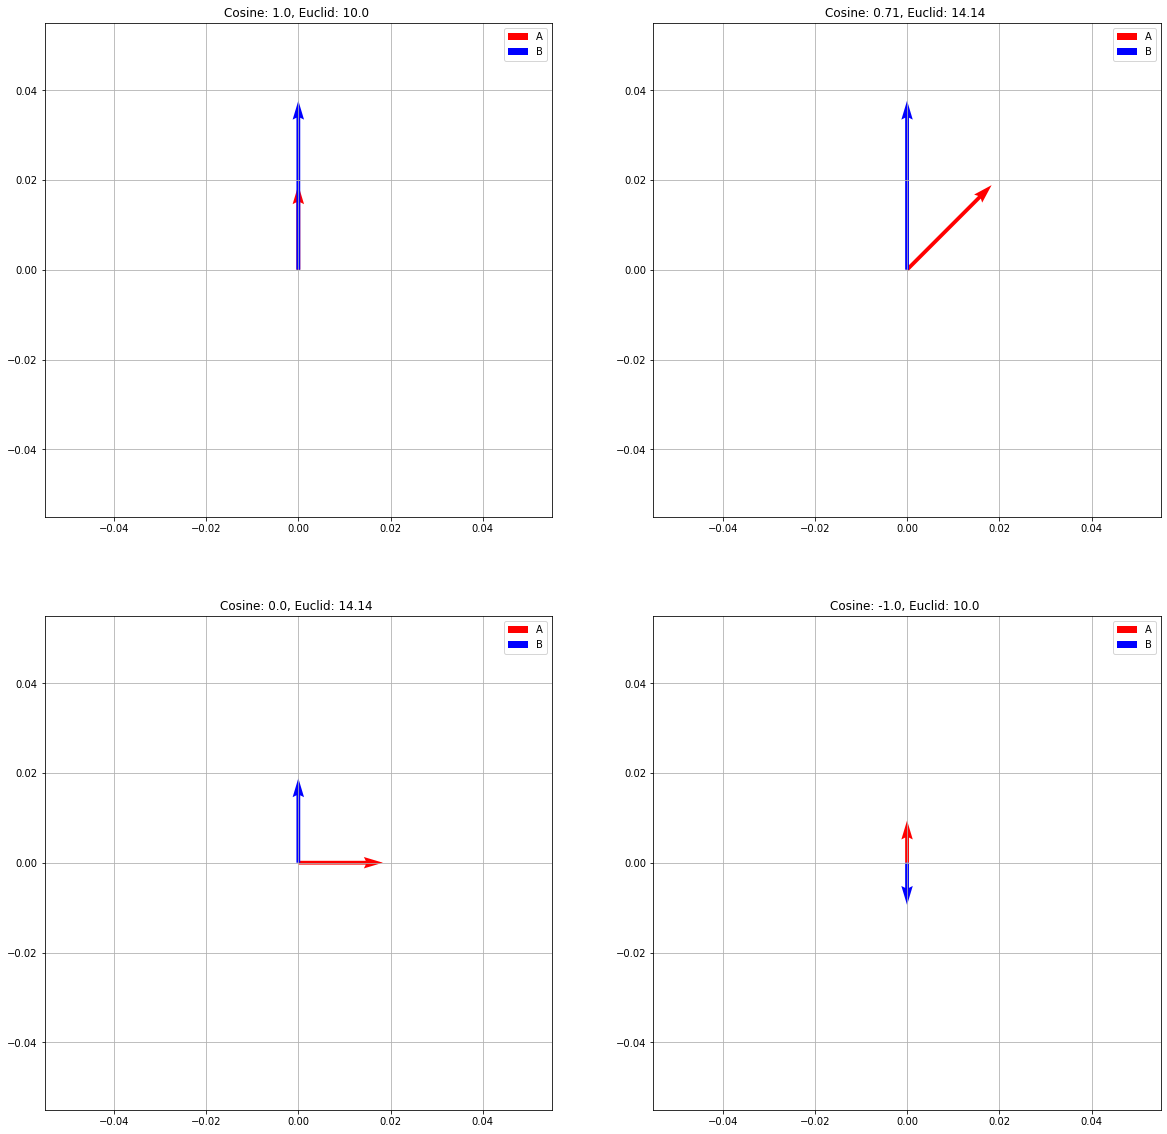

In [24]:
plt.figure(figsize=(20,20))

# Case A1 -> Vectors pointing to same direction -> Cos: 1.0 Euclid: 10.0
V = np.array([[0,10],[0,20]])
plt.subplot(2,2,1)
plotVectors(V)

# Case A2 -> Vectors pointing oposite directions -> Cos: -1.0 Euclid: 10.0
V = np.array([[0,5],[0,-5]])
plt.subplot(2,2,4)
plotVectors(V)

# Case B1 -> Vectors on 45deg angle -> Cos: 0.71 Euclid: 14.14
V = np.array([[10,10],[0,20]])
plt.subplot(2,2,2)
plotVectors(V)

# Case B2 -> Vectors on 90deg angle -> Cos: 0.0 Euclid: 14.14
V = np.array([[10,0],[0,10]])
plt.subplot(2,2,3)
plotVectors(V)

# NLP Recommender System

- Count Vectorizer [https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
docs = {
    "trump":"Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin",
    "election":"President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election",
    "putin":"Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career",
    "soup": "Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid.",
    "noodles":"Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes.",
    "dosa":"Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat similar to a crepe in appearance. Its main ingredients are rice and black gram."
}

In [34]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(docs.values())
print(list(count_vectorizer.vocabulary_.keys()))
m = sparse_matrix.todense()
print(m.shape)
print(m[0])

['mr', 'trump', 'became', 'president', 'after', 'winning', 'the', 'political', 'election', 'though', 'he', 'lost', 'support', 'of', 'some', 'republican', 'friends', 'is', 'with', 'putin', 'says', 'had', 'no', 'interference', 'outcome', 'it', 'was', 'witchhunt', 'by', 'parties', 'claimed', 'friend', 'who', 'nothing', 'to', 'do', 'post', 'elections', 'vladimir', 'russia', 'served', 'as', 'prime', 'minister', 'earlier', 'in', 'his', 'career', 'soup', 'primarily', 'liquid', 'food', 'generally', 'warm', 'or', 'hot', 'but', 'may', 'be', 'cool', 'cold', 'that', 'made', 'combining', 'ingredients', 'meat', 'vegetables', 'stock', 'juice', 'water', 'another', 'noodles', 'are', 'staple', 'many', 'cultures', 'they', 'from', 'unleavened', 'dough', 'which', 'stretched', 'extruded', 'rolled', 'flat', 'and', 'cut', 'into', 'one', 'variety', 'shapes', 'dosa', 'type', 'pancake', 'indian', 'subcontinent', 'fermented', 'batter', 'somewhat', 'similar', 'crepe', 'appearance', 'its', 'main', 'rice', 'black', 

In [35]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=docs.keys())
display(df)
display(df[["trump","putin"]])

,after,and,another,appearance,are,as,batter,be,became,black,...,vegetables,vladimir,warm,was,water,which,who,winning,witchhunt,with
trump,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
election,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
putin,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
soup,0,0,1,0,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,1
noodles,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
dosa,0,1,0,1,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


,trump,putin
trump,2,1
election,1,2
putin,0,2
soup,0,0
noodles,0,0
dosa,0,0


In [64]:
from sklearn.metrics.pairwise import cosine_similarity as distance
#from sklearn.metrics import pairwise_distances
#from sklearn.metrics.pairwise import euclidean_distances as distance

# Compute Cosine Similarity matrix (or selected distance)
#similarity_matrix = pairwise_distances(df,df, metric='cosine')
similarity_matrix = distance(df,df)
print(similarity_matrix)

[[1.         0.51480485 0.38890873 0.10101525 0.09375    0.15386436]
 [0.51480485 1.         0.38829014 0.11886433 0.04902903 0.19312182]
 [0.38890873 0.38829014 1.         0.05714286 0.10606602 0.10444659]
 [0.10101525 0.11886433 0.05714286 1.         0.25253814 0.17407766]
 [0.09375    0.04902903 0.10606602 0.25253814 1.         0.3385016 ]
 [0.15386436 0.19312182 0.10444659 0.17407766 0.3385016  1.        ]]


,trump,election,putin,soup,noodles,dosa
trump,1.000000,0.514805,0.388909,0.101015,0.093750,0.153864
election,0.514805,1.000000,0.388290,0.118864,0.049029,0.193122
putin,0.388909,0.388290,1.000000,0.057143,0.106066,0.104447
soup,0.101015,0.118864,0.057143,1.000000,0.252538,0.174078
noodles,0.093750,0.049029,0.106066,0.252538,1.000000,0.338502
dosa,0.153864,0.193122,0.104447,0.174078,0.338502,1.000000


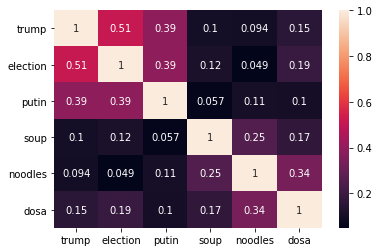

In [65]:
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=docs.keys(), index=docs.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [66]:
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df.idxmax()

trump       election
election       trump
putin          trump
soup         noodles
noodles         dosa
dosa         noodles
dtype: object

# NLP Recommender with stemming and lemmatization

- https://www.nltk.org/howto/stem.html
- http://www.nltk.org/api/nltk.stem.html?highlight=lemmatizer
- https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

## More....
- https://www.freecodecamp.org/news/singular-value-decomposition-vs-matrix-factorization-in-recommender-systems-b1e99bc73599/
- https://www.machinelearningplus.com/nlp/cosine-similarity/

## Other distance metrics
- **Jaccard Similarity**: The measurement is refer to number of common words over all words. More commons mean both objects should be similarity.
Jaccard Similarity = (Intersection of A and B) / (Union of A and B)
- **Hamming distance** (ex:between 2 strings). https://en.wikipedia.org/wiki/Hamming_distance
- **Mahalanobis distance** https://en.wikipedia.org/wiki/Mahalanobis_distance
